# ORTHOGONAL POLYNOMIAL DENSITY ESTIMATION
## Preliminaries
### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from uuid import uuid4

from lpde.geometry import WidthOf, Window, PointAt, BoundingBox, Mapper, Grid
from lpde.estimators import ParallelEstimator
from lpde.estimators.datatypes import Event, Degree, Action
from lpde.producers import MockParams
from lpde.producers.distributions import gaussian

### Notebook settings

In [2]:
%matplotlib notebook

## Density Estimation
### Initialize

In [11]:
legendre_width = WidthOf(1.8)

center = PointAt(0, 0)
window = Window(1.8, 1.8)
bounds = BoundingBox(center, window)

mapper = Mapper(bounds, legendre_width)

degree = Degree(20, 20)
params = MockParams(20, 100, gaussian)
density = ParallelEstimator(degree, mapper, params)

action = Action.ADD
point = PointAt(0.5, 0.5)
event = Event(uuid4(), action, point)

grid = Grid(100, 100)

### Start, check, and stop

In [12]:
density.controller.start(1, 1.0)

/home/georg/Documents/Python/LPDE/lpde/estimators/parallel/minimizer.py:119: RuntimeWarning: overflow encountered in double_scalars
  return self.__neg_log_l(c[1:]) + c[0]*self.__norm(c[1:])
/home/georg/Documents/Python/LPDE/lpde/estimators/parallel/minimizer.py:127: RuntimeWarning: overflow encountered in square
  return -log(square(c.dot(self.__phi_ijn))).sum()
/home/georg/Documents/Python/LPDE/lpde/estimators/parallel/minimizer.py:123: RuntimeWarning: overflow encountered in multiply
  self.__grad_c[1:] = self.__grad_neg_log_l(c[1:]) + 2.0*c[0]*c[1:]


In [17]:
density.controller.alive

{'minimizers': (False,),
 'producer': False,
 'smoother': False,
 'transformer': False}

In [18]:
density.controller.open

{'coefficients': False, 'events': False, 'phi': False}

In [19]:
density.controller.qsize

{'coefficients': None, 'events': None, 'phi': None}

In [ ]:
density.update_with(event)

In [16]:
density.controller.stop()

### Plot final density

<IPython.core.display.Javascript object>


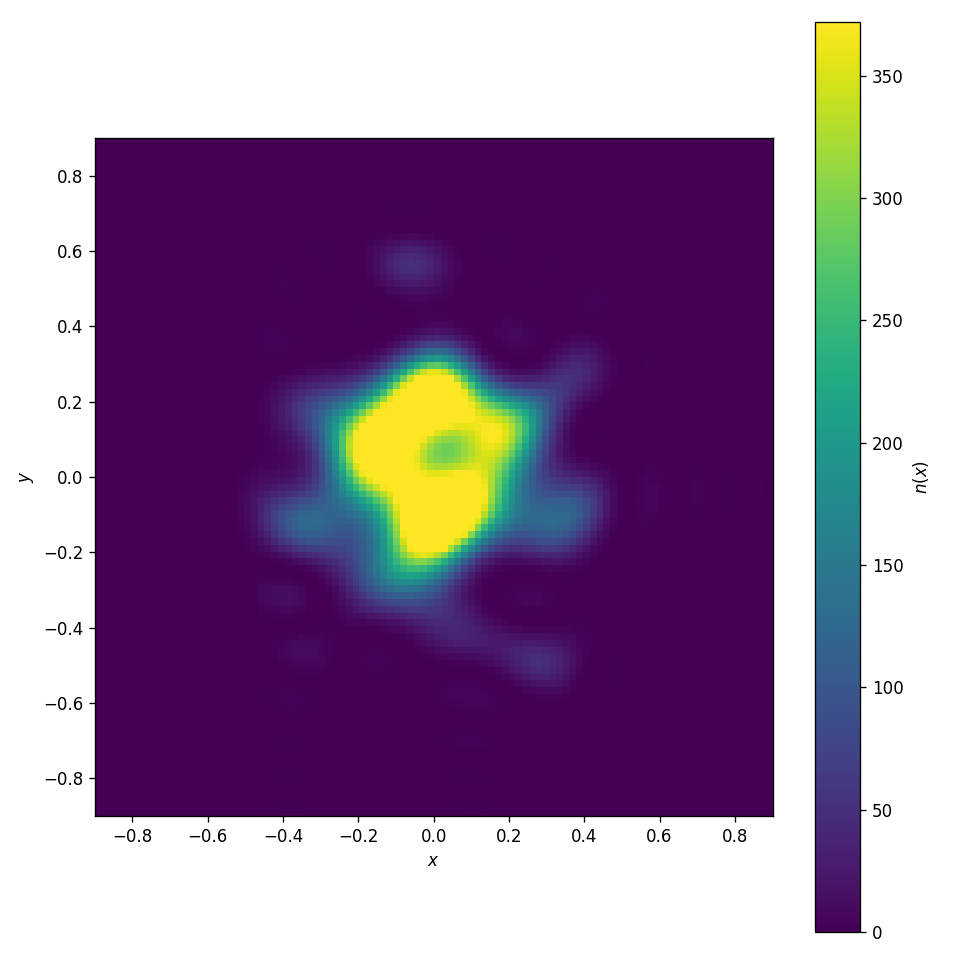

In [10]:
fig_size_x = 8

fig, ax = plt.subplots(figsize=(fig_size_x, fig_size_x*bounds.aspect))
ax.set(xlabel=r'$x$', ylabel=r'$y$')
contour = ax.imshow(density.on_grid,
                    cmap='viridis',
                    alpha=1.0,
                    extent=bounds.x_range+bounds.y_range,
                    origin='lower',
                    aspect=bounds.aspect,
                    animated=True)
cbar = plt.colorbar(contour, ax=ax, label=r'$n(x)$')
fig.tight_layout()

def update_figure(*args):
    contour.set_data(density.on_grid)
    return contour,

animation = FuncAnimation(fig, update_figure, interval=50, blit=True)
plt.show()

In [ ]:
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.tile_providers import STAMEN_TONER, STAMEN_TERRAIN

bound = 20000000 # meters
fig = figure(tools='pan, wheel_zoom', x_range=(-bound, bound), y_range=(-bound, bound))
fig.axis.visible = False
fig.add_tile(STAMEN_TERRAIN)
output_file("stamen_toner_plot.html")
show(fig)

In [ ]:
from bokeh.plotting import figure, show, output_file

p = figure(x_range=bounds.x_range, y_range=bounds.y_range)

# must give a vector of image data for image parameter
p.image(image=[n_hat],
        x=bounds.x_range[0],
        y=bounds.y_range[0],
        dw=bounds.window[0],
        dh=bounds.window[1],
        palette="Spectral11",
        alpha=0.8)

output_file("image.html", title="image.py example")

show(p)  # open a browser